## Divided by season

In [2]:
!pip install threddsclient
import threddsclient
import xarray as xr

  Using cached threddsclient-0.4.2-py3-none-any.whl


In [3]:
# Find url addresses for files on EBAS

all_opendap_urls = threddsclient.opendap_urls(
'https://thredds.nilu.no/thredds/catalog/ebas/catalog.xml')

# get all data urls for one station, e.g., Zeppelin NO0042G
opendap_urls = [x for x in all_opendap_urls if 'NO0042G' in x]
# get all scattering data urls
opendap_urls = [x for x in opendap_urls if 'particle_number_size_distribution' in x]
opendap_urls = [x for x in opendap_urls if 'lev2' in x]

opendap_urls

['https://thredds.nilu.no/thredds/dodsC/ebas/NO0042G.20080101000000.20181205100800.dmps.particle_number_size_distribution.aerosol.3y.1h.SE03L_ASP-DMPS-1.SE03L_dmps_ASP-DMPS-1.lev2.nc',
 'https://thredds.nilu.no/thredds/dodsC/ebas/NO0042G.20080101000000.20181205100800.dmps.particle_number_size_distribution.aerosol.1y.1h.SE03L_ASP-DMPS-1.SE03L_dmps_ASP-DMPS-1.lev2.nc',
 'https://thredds.nilu.no/thredds/dodsC/ebas/NO0042G.20060101000000.20181205100800.dmps.particle_number_size_distribution.aerosol.2y.1h.NO01L_dmps_no42.NO01L_dmps.lev2.nc',
 'https://thredds.nilu.no/thredds/dodsC/ebas/NO0042G.20000301000000.20170523103005.dmps.particle_number_size_distribution.aerosol.6y.1h.NO01L_dmps_no42.NO01L_dmps.lev2.nc']

In [4]:
#Name the urls by what year it is from.

dsmf08 = xr.open_mfdataset(opendap_urls[:1])
dsmf08

<xarray.Dataset>
Dimensions:                                         (time: 26280, tbnds: 2,
                                                     metadata_time: 3, D: 20,
                                                     particle_number_size_distribution_qc_flags: 2)
Coordinates:
  * time                                            (time) datetime64[ns] 200...
  * metadata_time                                   (metadata_time) datetime64[ns] ...
  * D                                               (D) float64 10.0 ... 794.3
Dimensions without coordinates: tbnds,
                                particle_number_size_distribution_qc_flags
Data variables:
    time_bnds                                       (time, tbnds) datetime64[ns] dask.array<chunksize=(26280, 2), meta=np.ndarray>
    metadata_time_bnds                              (metadata_time, tbnds) datetime64[ns] dask.array<chunksize=(3, 2), meta=np.ndarray>
    particle_number_size_distribution_ebasmetadata  (D, metadata_time) |S64 dask.array<chunksize=(20, 3), meta=np.ndarray>
    particle_number_size_distribution_qc            (D, particle_number_size_distribution_qc_flags, time) float64 dask.array<chunksize=(20, 2, 26280), meta=np.ndarray>
    particle_number_size_distribution               (D, time) float64 dask.array<chunksize=(20, 26280), meta=np.ndarray>
Attributes: (12/46)
    Conventions:                   CF-1.7, ACDD-1.3
    featureType:                   timeSeries
    title:                         Ground based in situ observations of parti...
    keywords:                      NO0042G, Zeppelin mountain (Ny-Ålesund), p...
    id:                            NO0042G.20080101000000.20181205100800.dmps...
    naming_authority:              EBAS
    ...                            ...
    geospatial_lat_units:          degrees_north
    geospatial_lon_units:          degrees_east
    comment:                       {\n    "Data definition": "EBAS_1.1", \n  ...
    standard_name_vocabulary:      CF-1.7, ACDD-1.3
    history:                       None
    creator_url:                   ebas.nilu.no

In [5]:
ma = dsmf08['particle_number_size_distribution'].max('D')<3e4

/srv/conda/envs/notebook/lib/python3.9/site-packages/dask/array/reductions.py:615: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)
/srv/conda/envs/notebook/lib/python3.9/site-packages/dask/array/reductions.py:615: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)


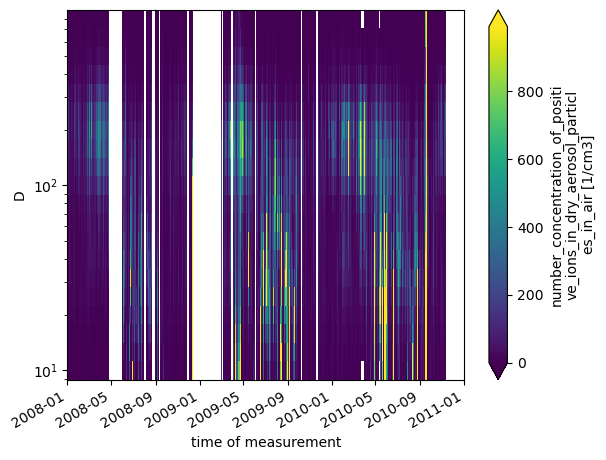

In [6]:
dsmf08_ma = dsmf08.where(ma)
dsmf08_ma.compute()
dsmf08_ma['particle_number_size_distribution'].plot(robust=True, yscale='log')

In [7]:
import matplotlib.pyplot as plt

<xarray.DataArray 'season' ()>
array('DJF', dtype='<U3')
Coordinates:
    season   <U3 'DJF'
<xarray.DataArray 'season' ()>
array('JJA', dtype='<U3')
Coordinates:
    season   <U3 'JJA'
<xarray.DataArray 'season' ()>
array('MAM', dtype='<U3')
Coordinates:
    season   <U3 'MAM'
<xarray.DataArray 'season' ()>
array('SON', dtype='<U3')
Coordinates:
    season   <U3 'SON'


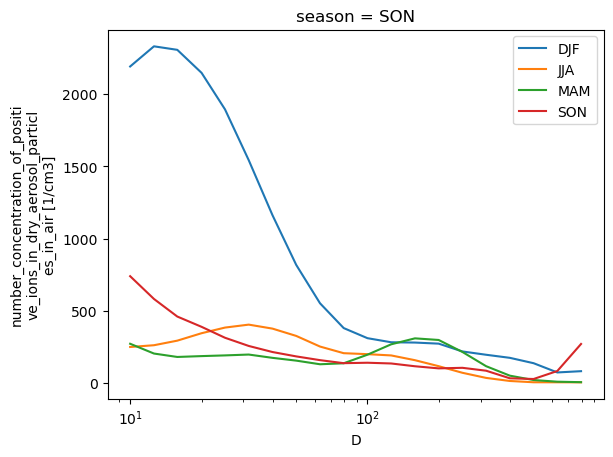

In [8]:
#First the data has been plotted, separated by season.
dsmf08_season = dsmf08.groupby('time.season').mean(keep_attrs=True)
for seas in dsmf08_season.season:
    print(seas)
    dsmf08_season.sel(season=seas)['particle_number_size_distribution'].plot(xscale = "log", label=seas.values)
#dsmf08_season['particle_number_size_distribution'].mean(dim = "time").plot(xscale = "log")
plt.legend()

<xarray.DataArray 'season' ()>
array('DJF', dtype='<U3')
Coordinates:
    season   <U3 'DJF'
<xarray.DataArray 'season' ()>
array('JJA', dtype='<U3')
Coordinates:
    season   <U3 'JJA'
<xarray.DataArray 'season' ()>
array('MAM', dtype='<U3')
Coordinates:
    season   <U3 'MAM'
<xarray.DataArray 'season' ()>
array('SON', dtype='<U3')
Coordinates:
    season   <U3 'SON'


/srv/conda/envs/notebook/lib/python3.9/site-packages/dask/array/reductions.py:615: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)
/srv/conda/envs/notebook/lib/python3.9/site-packages/dask/array/reductions.py:615: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)


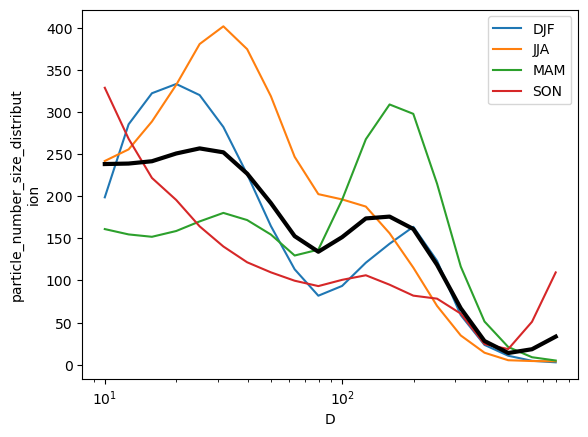

In [9]:
#Now the once the mask has been applied to the data
dsmf08_season = dsmf08_ma.groupby('time.season').mean(keep_attrs=True)
for seas in dsmf08_season.season:
    print(seas)
    dsmf08_season.sel(season=seas)['particle_number_size_distribution'].plot(xscale = "log", label=seas.values)
#dsmf08_season['particle_number_size_distribution'].mean(dim = "time").plot(xscale = "log")
plt.legend()

ma = dsmf08['particle_number_size_distribution'].max('D')<3e4
dsmf08['particle_number_size_distribution'].where(ma).mean(dim = "time").plot(xscale = "log", c='black', linewidth = 3)

<xarray.DataArray 'season' ()>
array('DJF', dtype='<U3')
Coordinates:
    season   <U3 'DJF'
<xarray.DataArray 'season' ()>
array('JJA', dtype='<U3')
Coordinates:
    season   <U3 'JJA'
<xarray.DataArray 'season' ()>
array('MAM', dtype='<U3')
Coordinates:
    season   <U3 'MAM'
<xarray.DataArray 'season' ()>
array('SON', dtype='<U3')
Coordinates:
    season   <U3 'SON'


/srv/conda/envs/notebook/lib/python3.9/site-packages/dask/array/reductions.py:615: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)


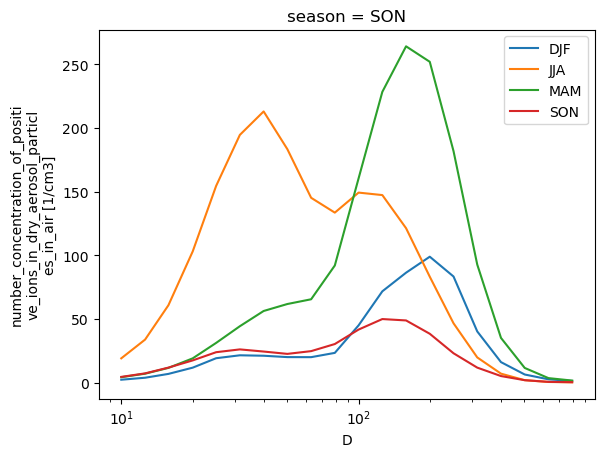

In [10]:
dsmf08_season = dsmf08_ma.groupby('time.season').median(keep_attrs=True)
for seas in dsmf08_season.season:
    print(seas)
    dsmf08_season.sel(season=seas)['particle_number_size_distribution'].plot(xscale = "log", label=seas.values)
#dsmf08_season['particle_number_size_distribution'].mean(dim = "time").plot(xscale = "log")
plt.legend()

<xarray.DataArray 'season' ()>
array('DJF', dtype='<U3')
Coordinates:
    season   <U3 'DJF'
<xarray.DataArray 'season' ()>
array('JJA', dtype='<U3')
Coordinates:
    season   <U3 'JJA'
<xarray.DataArray 'season' ()>
array('MAM', dtype='<U3')
Coordinates:
    season   <U3 'MAM'
<xarray.DataArray 'season' ()>
array('SON', dtype='<U3')
Coordinates:
    season   <U3 'SON'


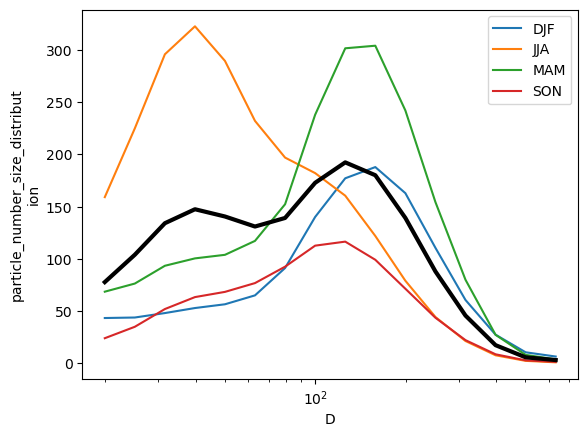

In [11]:
dsmf00 = xr.open_mfdataset(opendap_urls[3:4])
dsmf00

dsmf00_season = dsmf00.groupby('time.season').mean(keep_attrs=True)
for seas in dsmf00_season.season:
    print(seas)
    dsmf00_season.sel(season=seas)['particle_number_size_distribution'].plot(xscale = "log", label=seas.values)
#dsmf00_season['particle_number_size_distribution'].mean(dim = "time").plot(xscale = "log")
plt.legend()

dsmf00['particle_number_size_distribution'].mean(dim = "time").plot(xscale = "log", c='black',linewidth=3)
plt.legend()

<xarray.DataArray 'season' ()>
array('DJF', dtype='<U3')
Coordinates:
    season   <U3 'DJF'
<xarray.DataArray 'season' ()>
array('JJA', dtype='<U3')
Coordinates:
    season   <U3 'JJA'
<xarray.DataArray 'season' ()>
array('MAM', dtype='<U3')
Coordinates:
    season   <U3 'MAM'
<xarray.DataArray 'season' ()>
array('SON', dtype='<U3')
Coordinates:
    season   <U3 'SON'


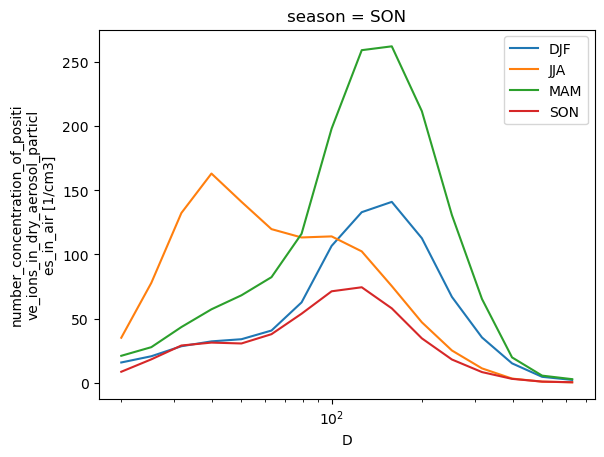

In [12]:
dsmf00_season = dsmf00.groupby('time.season').median(keep_attrs=True)
for seas in dsmf00_season.season:
    print(seas)
    dsmf00_season.sel(season=seas)['particle_number_size_distribution'].plot(xscale = "log", label=seas.values)
#dsmf00_season['particle_number_size_distribution'].mean(dim = "time").plot(xscale = "log")
plt.legend()

<xarray.DataArray 'season' ()>
array('DJF', dtype='<U3')
Coordinates:
    season   <U3 'DJF'
<xarray.DataArray 'season' ()>
array('JJA', dtype='<U3')
Coordinates:
    season   <U3 'JJA'
<xarray.DataArray 'season' ()>
array('MAM', dtype='<U3')
Coordinates:
    season   <U3 'MAM'
<xarray.DataArray 'season' ()>
array('SON', dtype='<U3')
Coordinates:
    season   <U3 'SON'


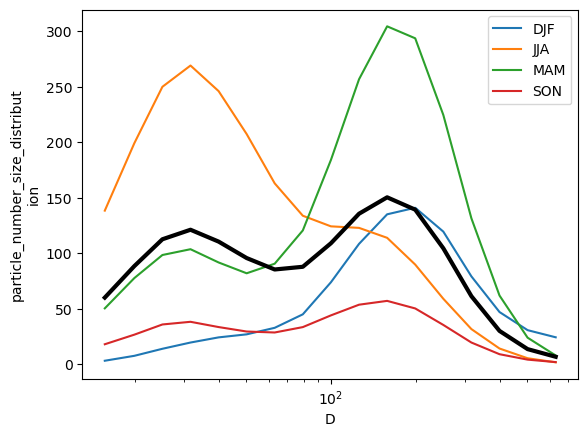

In [13]:
dsmf06 = xr.open_mfdataset(opendap_urls[2:3])
dsmf06

dsmf06_season = dsmf06.groupby('time.season').mean(keep_attrs=True)
for seas in dsmf06_season.season:
    print(seas)
    dsmf06_season.sel(season=seas)['particle_number_size_distribution'].plot(xscale = "log", label=seas.values)
#dsmf06_season['particle_number_size_distribution'].mean(dim = "time").plot(xscale = "log")
plt.legend()

dsmf06['particle_number_size_distribution'].mean(dim = "time").plot(xscale = "log",c='black',linewidth=3)

## Monthly data

In [18]:
dsmf00_month.compute()

<xarray.Dataset>
Dimensions:                                         (D: 16,
                                                     particle_number_size_distribution_qc_flags: 1,
                                                     month: 12,
                                                     metadata_time: 6, tbnds: 2)
Coordinates:
  * metadata_time                                   (metadata_time) datetime64[ns] ...
  * D                                               (D) float64 19.97 ... 630.9
  * month                                           (month) int64 1 2 ... 11 12
Dimensions without coordinates: particle_number_size_distribution_qc_flags,
                                tbnds
Data variables:
    particle_number_size_distribution_qc            (D, particle_number_size_distribution_qc_flags, month) float64 ...
    particle_number_size_distribution               (D, month) float64 55.95 ...
    metadata_time_bnds                              (month, metadata_time, tbnds) datetime64[ns] ...
    particle_number_size_distribution_ebasmetadata  (month, D, metadata_time) |S64 ...
Attributes: (12/46)
    Conventions:                   CF-1.7, ACDD-1.3
    featureType:                   timeSeries
    title:                         Ground based in situ observations of parti...
    keywords:                      NO0042G, Zeppelin mountain (Ny-Ålesund), p...
    id:                            NO0042G.20000301000000.20170523103005.dmps...
    naming_authority:              EBAS
    ...                            ...
    geospatial_lat_units:          degrees_north
    geospatial_lon_units:          degrees_east
    comment:                       {\n    "Data definition": "EBAS_1.1", \n  ...
    standard_name_vocabulary:      CF-1.7, ACDD-1.3
    history:                       None
    creator_url:                   ebas.nilu.no

In [69]:
month = {	1:'Jan',
		2:'Feb',
		3:'Mar',
		4:'Apr',
		5:'May',
		6:'Jun',
		7:'Jul',
		8:'Aug',
		9:'Sep',
		10:'Oct',
		11:'Nov',
		12:'Dec'}

In [56]:
dsmf00_month['month']

<xarray.DataArray 'month' (month: 12)>
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [70]:
month

{1: 'Jan',
 2: 'Feb',
 3: 'Mar',
 4: 'Apr',
 5: 'May',
 6: 'Jun',
 7: 'Jul',
 8: 'Aug',
 9: 'Sep',
 10: 'Oct',
 11: 'Nov',
 12: 'Dec'}

In [77]:
colours = '#d33402','#d65700','#d87300','#d98c09','#d9a424','#d9ba3e','#90b548','#43a964','#00987f','#008491','#006d92','#075582'
colours

('#d33402',
 '#d65700',
 '#d87300',
 '#d98c09',
 '#d9a424',
 '#d9ba3e',
 '#90b548',
 '#43a964',
 '#00987f',
 '#008491',
 '#006d92',
 '#075582')

1
2
3
4
5
6
7
8
9
10
11
12


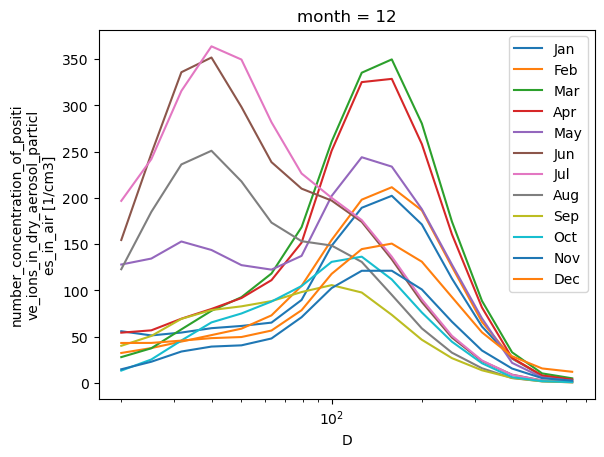

In [79]:
dsmf00_month = dsmf00.groupby('time.month').mean(keep_attrs=True)
for seas in dsmf00_month.month:
    print(seas.values)

    dsmf00_month.sel(month=seas)['particle_number_size_distribution'].plot(xscale = "log", label=month[int(seas.values)])
#dsmf00_season['particle_number_size_distribution'].mean(dim = "time").plot(xscale = "log")
plt.legend()

In [27]:
import numpy as np

In [39]:
seas.values

array(1)

1
2
3
4
5
6
7
8
9
10
11
12


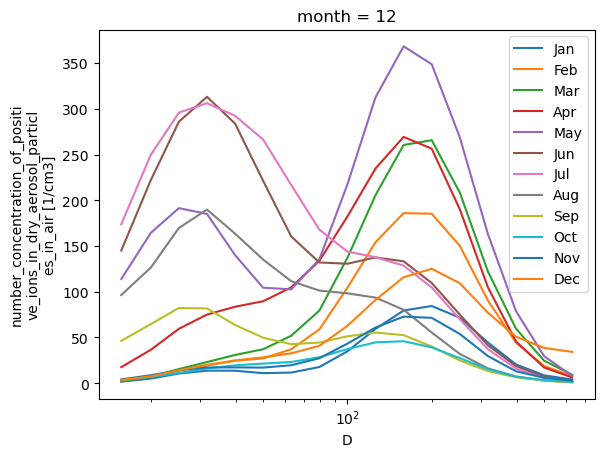

In [80]:
dsmf06_month = dsmf06.groupby('time.month').mean(keep_attrs=True)
for seas in dsmf06_month.month:
    print(seas.values)

    dsmf06_month.sel(month=seas)['particle_number_size_distribution'].plot(xscale = "log", label=month[int(seas.values)])
#dsmf00_season['particle_number_size_distribution'].mean(dim = "time").plot(xscale = "log")
plt.legend()

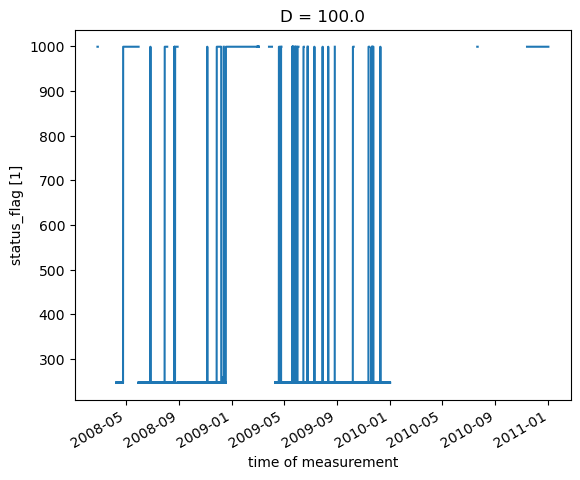

In [98]:
dsmf08['particle_number_size_distribution_qc'].isel(particle_number_size_distribution_qc_flags=0).isel(D=10).plot()#yscale='log')

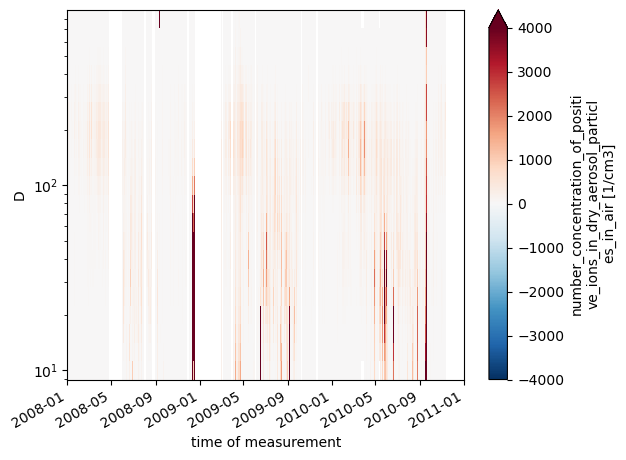

In [100]:
dsmf08['particle_number_size_distribution'].plot(yscale='log', vmax = 4e3)

In [93]:
dsmf08#['particle_number_size_distribution']#.plot(yscale='log',robust=True)

<xarray.Dataset>
Dimensions:                                         (time: 26280, tbnds: 2,
                                                     metadata_time: 3, D: 20,
                                                     particle_number_size_distribution_qc_flags: 2)
Coordinates:
  * time                                            (time) datetime64[ns] 200...
  * metadata_time                                   (metadata_time) datetime64[ns] ...
  * D                                               (D) float64 10.0 ... 794.3
Dimensions without coordinates: tbnds,
                                particle_number_size_distribution_qc_flags
Data variables:
    time_bnds                                       (time, tbnds) datetime64[ns] dask.array<chunksize=(26280, 2), meta=np.ndarray>
    metadata_time_bnds                              (metadata_time, tbnds) datetime64[ns] dask.array<chunksize=(3, 2), meta=np.ndarray>
    particle_number_size_distribution_ebasmetadata  (D, metadata_time) |S64 dask.array<chunksize=(20, 3), meta=np.ndarray>
    particle_number_size_distribution_qc            (D, particle_number_size_distribution_qc_flags, time) float64 dask.array<chunksize=(20, 2, 26280), meta=np.ndarray>
    particle_number_size_distribution               (D, time) float64 dask.array<chunksize=(20, 26280), meta=np.ndarray>
Attributes: (12/46)
    Conventions:                   CF-1.7, ACDD-1.3
    featureType:                   timeSeries
    title:                         Ground based in situ observations of parti...
    keywords:                      NO0042G, Zeppelin mountain (Ny-Ålesund), p...
    id:                            NO0042G.20080101000000.20181205100800.dmps...
    naming_authority:              EBAS
    ...                            ...
    geospatial_lat_units:          degrees_north
    geospatial_lon_units:          degrees_east
    comment:                       {\n    "Data definition": "EBAS_1.1", \n  ...
    standard_name_vocabulary:      CF-1.7, ACDD-1.3
    history:                       None
    creator_url:                   ebas.nilu.no

1


ValueError: ['#d33402', '#d65700', '#d87300', '#d98c09', '#d9a424', '#d9ba3e', '#90b548', '#43a964', '#00987f', '#008491', '#006d92', '#075582'] is not a valid value for color

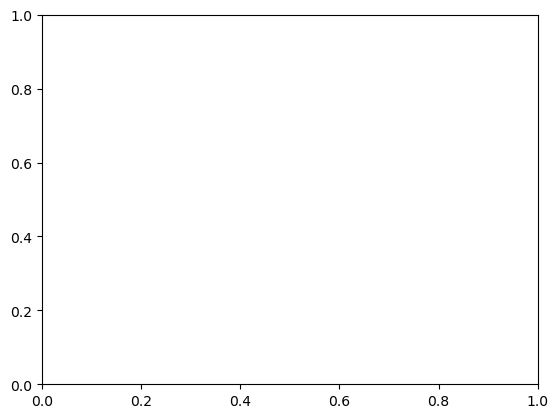

In [111]:
dsmf08_month = dsmf08.groupby('time.month').median(keep_attrs=True)
for seas in dsmf08_month.month:
    print(seas.values)

    dsmf08_month.sel(month=seas)['particle_number_size_distribution'].plot(xscale = "log", label=month[int(seas.values)], c =['#d33402','#d65700','#d87300','#d98c09','#d9a424','#d9ba3e','#90b548','#43a964','#00987f','#008491','#006d92','#075582'])
#dsmf00_season['particle_number_size_distribution'].mean(dim = "time").plot(xscale = "log")
plt.legend()

1
2
3
4
5
6
7
8
9


/srv/conda/envs/notebook/lib/python3.9/site-packages/dask/array/reductions.py:615: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)


10
11
12


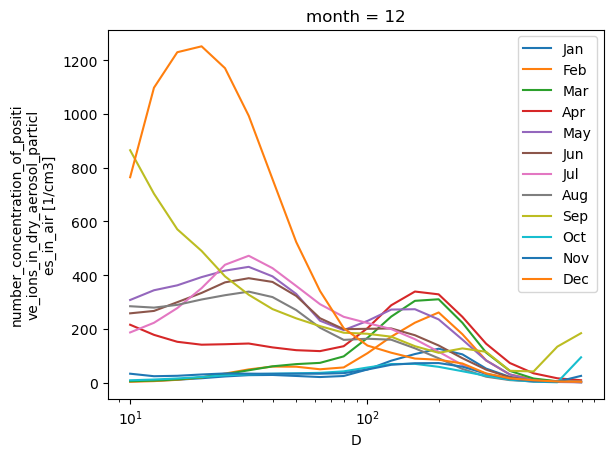

In [102]:
dsmf08_month = dsmf08_ma.groupby('time.month').mean(keep_attrs=True)
for seas in dsmf08_month.month:
    print(seas.values)

    dsmf08_month.sel(month=seas)['particle_number_size_distribution'].plot(xscale = "log", label=month[int(seas.values)])
#dsmf00_season['particle_number_size_distribution'].mean(dim = "time").plot(xscale = "log")
plt.legend()